## LIBRERÍAS

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## IMPORTAMOS LOS DATOS

In [3]:
train_data = pd.read_csv("/content/drive/My Drive/TFM/data/code_train_df.csv",header=0, decimal=',')
test_data = pd.read_csv("/content/drive/My Drive/TFM/data/code_test_df.csv",header=0, decimal=',')
#train_data = pd.read_csv("/content/drive/My Drive/Máster KSchool/TFM/data/code_train_df.csv",header=0, decimal=',')
#test_data = pd.read_csv("/content/drive/My Drive/Máster KSchool/TFM/data/code_test_df.csv",header=0, decimal=',')

In [4]:
train_data.head(3)

,Unnamed: 0,COLOR,DIRECTOR,GENRES_0,GENRES_1,GENRES_2,LANGUAGE_0,COUNTRY_0,KEYWORDS_0,KEYWORDS_1,KEYWORDS_2,WRITERS_0,CONTENT_RATING,KEYWORDS_DESCRIPTION,ACTOR_0,ACTOR_1,ACTOR_2,CODE,DURATION,YEAR,RATING_CAT
0,0,0,476,0,0,0,32,129,2571,5678,13998,2381,0,8811,4405,4405,1664,29527,88,1937,1
1,1,1,2490,10,10,10,32,129,12105,146,12182,2100,0,4027,2181,2181,2140,165866,105,1998,2
2,2,1,2490,4,5,8,32,129,3553,2137,8376,1924,0,4765,431,431,3594,45171,97,1952,2


In [5]:
FEATURES = ['YEAR','DURATION','COLOR','DIRECTOR','GENRES_0','GENRES_1','GENRES_2','LANGUAGE_0','COUNTRY_0','KEYWORDS_0','KEYWORDS_1','KEYWORDS_2','WRITERS_0','CONTENT_RATING','KEYWORDS_DESCRIPTION','ACTOR_0','ACTOR_1','ACTOR_2']
X_train = train_data[FEATURES]
y_train = train_data.RATING_CAT
X_test = test_data[FEATURES]
y_test = test_data.RATING_CAT

In [6]:
print(len(X_train),len(y_train),len(X_test),len(y_test))


47700 47700 11925 11925


## RANDOM FOREST

HIPERPARAMETROS

In [7]:
n_estimators=100
criterion = 'gini'

In [8]:
clf = RandomForestClassifier(n_estimators=n_estimators,criterion=criterion)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [9]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6166876310272537


In [10]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.40      0.50      2226
           1       0.57      0.68      0.62      5233
           2       0.67      0.64      0.66      4466

    accuracy                           0.62     11925
   macro avg       0.64      0.58      0.59     11925
weighted avg       0.63      0.62      0.61     11925



## MATRIZ DE CONFUSIÓN

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[ 899 1150  177]
 [ 400 3577 1256]
 [  47 1541 2878]]
Normalized confusion matrix
[[0.40386343 0.51662174 0.07951482]
 [0.07643799 0.68354672 0.24001529]
 [0.01052396 0.3450515  0.64442454]]


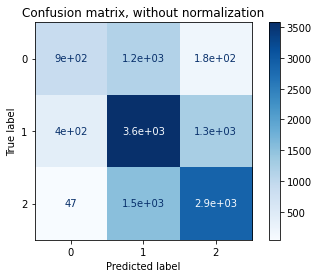

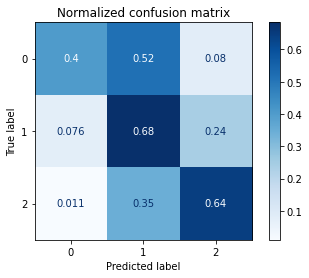

In [11]:
print(__doc__)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=['0','1','2'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()